<a href="https://colab.research.google.com/github/mdsatria/boredcode/blob/master/webinar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Keras](https://miro.medium.com/max/500/1*LBjjmGofNJ_6vetddYAvIQ.jpeg)

# Data Belajar untuk Komputer

In [1]:
import numpy as np
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
import matplotlib.pyplot as plt

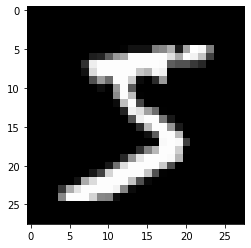

In [4]:
plt.imshow(x_train[0,:,:], cmap='gray')

# Bagaimana Cara Komputer Belajar ? (ANN)

![Keras](https://raw.githubusercontent.com/mdsatria/boredcode/master/img/nn.svg)

## Reshape Data

$$\begin{bmatrix}
1 & 2 & 3\\ 
 4& 5 &6 \\ 
 7& 8 & 9
\end{bmatrix}$$

$$\begin{bmatrix}
1 & 2 & 3 &
 4& 5 &6 & 
 7& 8 & 9
\end{bmatrix}$$

In [5]:
reshaped_x_train = x_train.reshape(-1,28*28)
reshaped_x_test = x_test.reshape(-1,28*28)

In [6]:
from keras.utils import to_categorical

In [7]:
n_class = 10

reshaped_y_train = to_categorical(y_train, n_class)
reshaped_y_test = to_categorical(y_test, n_class)

In [8]:
from keras.models import Sequential
from keras.layers import Dense

## Buat Arsitektur Model

In [9]:
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(n_class, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train Model

In [10]:
model.fit(reshaped_x_train, reshaped_y_train, validation_data=(reshaped_x_test, reshaped_y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.9762 - accuracy: 0.8156 - val_loss: 0.3535 - val_accuracy: 0.9067
Epoch 2/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.2914 - accuracy: 0.9266 - val_loss: 0.2571 - val_accuracy: 0.9373
Epoch 3/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.1925 - accuracy: 0.9492 - val_loss: 0.1965 - val_accuracy: 0.9488
Epoch 4/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.1435 - accuracy: 0.9618 - val_loss: 0.1564 - val_accuracy: 0.9607
Epoch 5/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.1209 - accuracy: 0.9673 - val_loss: 0.1434 - val_accuracy: 0.9636
Epoch 6/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0972 - accuracy: 0.9735 - val_loss: 0.1323 - val_accuracy: 0.9664
Epoch 7/10
60000/60000 [==============================] - 7s 

In [11]:
model.save('model.h5')
print("Saved model to disk")

Saved model to disk


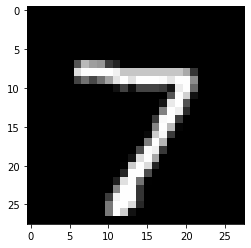

In [12]:
plt.imshow(x_test[0,:,:], cmap='gray')

In [13]:
y_test[0]

7

In [14]:
model.predict(reshaped_x_test[0].reshape(1,-1))

array([[3.5015487e-11, 4.1116422e-05, 1.4875674e-06, 2.7764693e-04,
        6.1475745e-05, 3.9438441e-06, 3.6475389e-12, 9.9829918e-01,
        1.3062609e-08, 1.3150788e-03]], dtype=float32)

In [15]:
model.predict(reshaped_x_test[0].reshape(1,-1)).argmax()

7

In [16]:
model.predict_classes(reshaped_x_test[0].reshape(1,-1))

array([7], dtype=int64)